In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

# Assuming the dataset is stored in a directory called 'dataset'
data_dir = '/kaggle/input/rock-paper-scissors-points/dataset'

# Function to load images from a directory
def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file)
                if file_path.endswith('.jpg') or file_path.endswith('.png'):
                    image = cv2.imread(file_path)
                    images.append(image)
                    labels.append(label)
    return images, labels

# Load the dataset
images, labels = load_images_from_directory(data_dir)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print some information about the dataset
print(f"Total images: {len(images)}")
print(f"Labels: {np.unique(labels)}")

Total images: 15000
Labels: ['paper' 'rock' 'scissors']


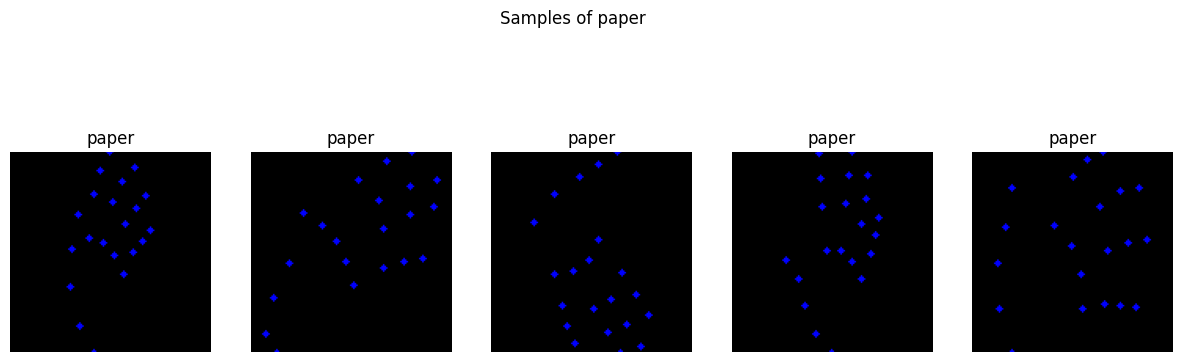

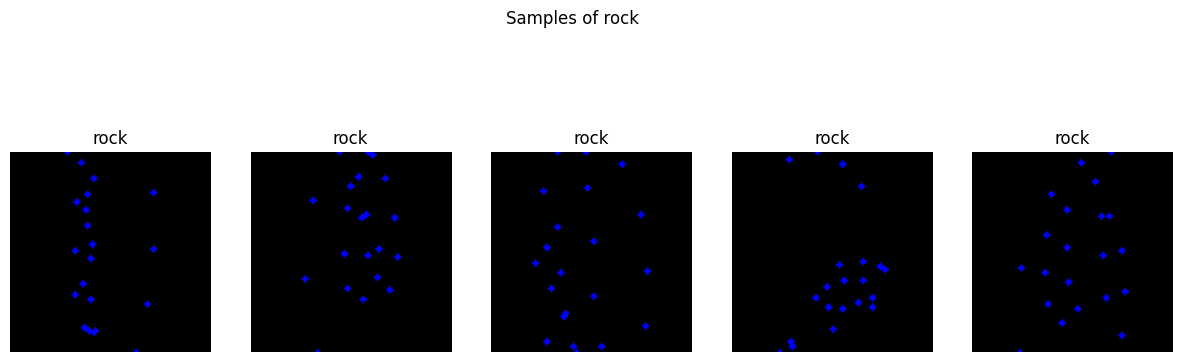

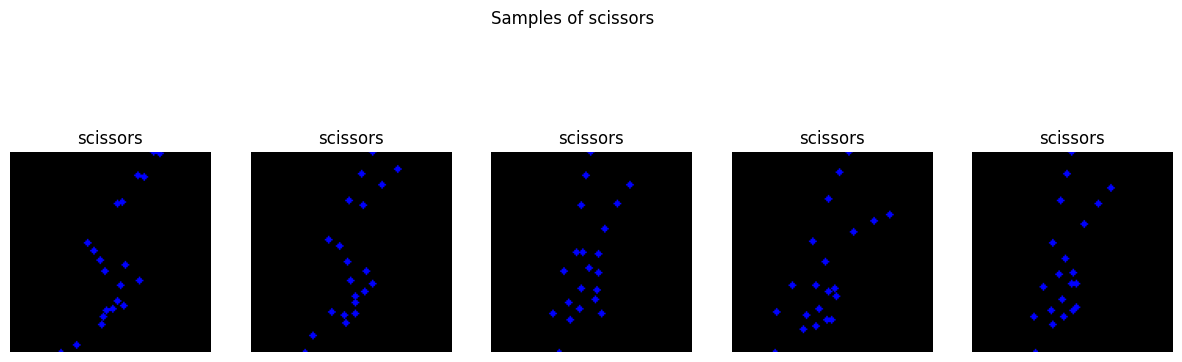

In [2]:
# Function to plot images
def plot_images(images, labels, title, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Plot sample images for each label
for label in np.unique(labels):
    label_indices = np.where(labels == label)[0]
    plot_images(images[label_indices], labels[label_indices], title=f"Samples of {label}")

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Resize images to a standard size
IMG_SIZE = 128

def preprocess_images(images):
    processed_images = []
    for img in images:
        resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        processed_images.append(resized_img)
    return np.array(processed_images)

# Preprocess images
images = preprocess_images(images)

# Normalize images
images = images / 255.0

# Convert labels to one-hot encoding
label_map = {label: idx for idx, label in enumerate(np.unique(labels))}
labels = np.array([label_map[label] for label in labels])
labels = to_categorical(labels, num_classes=3)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


2024-06-11 10:34:46.509834: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 10:34:46.509937: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 10:34:46.641306: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training samples: 12000, Test samples: 3000


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    return model

input_shape = (IMG_SIZE, IMG_SIZE, 3)
model = build_model(input_shape)
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/50
 13/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6145 - loss: 0.7780

I0000 00:00:1718102138.366746      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718102138.386466      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9186 - loss: 0.2171

W0000 00:00:1718102145.674920      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.9190 - loss: 0.2161 - val_accuracy: 0.9977 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9944 - loss: 0.0193 - val_accuracy: 0.9993 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9956 - loss: 0.0112 - val_accuracy: 0.9953 - val_loss: 0.0101 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9943 - loss: 0.0174 - val_accuracy: 0.9990 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9976 - loss: 0.0103 - val_accuracy: 0.9997 - val_loss: 5.9778e-04 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9982 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 8.1709e-04 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9984 - loss: 0.00

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.1830e-05
Test accuracy: 100.00%


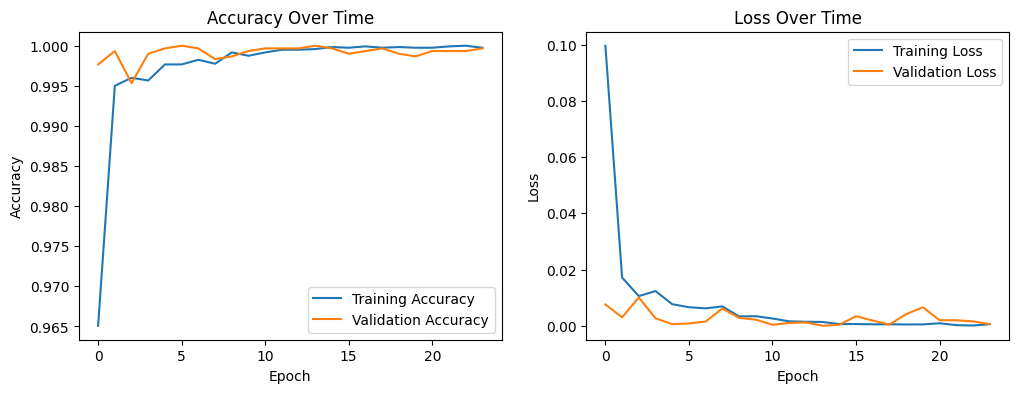

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.show()


In [8]:
# Save the entire model as a SavedModel.
model.save('rock_paper_scissors_model.h5')

In [15]:
pip --version

pip 23.3.2 from /opt/conda/lib/python3.10/site-packages/pip (python 3.10)
Note: you may need to restart the kernel to use updated packages.
